In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/09_Sep.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,26.000000,84.000000,1,6,1,2611.0,2627.0,2573.0,3066.0,3156.0,3562.0,2628.416667,2696.0
1,26.000000,84.666667,1,6,1,2634.0,2624.0,2597.0,3057.0,3098.0,3513.0,2635.750000,2685.0
2,26.000000,85.333333,1,6,1,2652.0,2598.0,2627.0,3028.0,3090.0,3487.0,2639.166667,2668.0
3,26.000000,86.000000,1,6,1,2662.0,2608.0,2605.0,2988.0,3052.0,3468.0,2641.666667,2635.0
4,26.000000,86.666667,2,6,1,2696.0,2611.0,2627.0,2968.0,3055.0,3477.0,2641.000000,2619.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,25.212452,87.862340,23,2,1,2694.0,2709.0,2765.0,2363.0,2560.0,3293.0,2691.250000,2656.0
8636,25.212452,87.862340,24,2,1,2681.0,2691.0,2748.0,2344.0,2545.0,3289.0,2683.000000,2649.0
8637,25.212452,87.862340,24,2,1,2663.0,2675.0,2708.0,2331.0,2534.0,3275.0,2673.583333,2595.0
8638,25.000000,87.862340,24,2,1,2682.0,2701.0,2687.0,2316.0,2542.0,3251.0,2664.750000,2581.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   int64  
 3   B       8640 non-null   int64  
 4   C       8640 non-null   int64  
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 877.6 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   float64
 3   B       8640 non-null   float64
 4   C       8640 non-null   float64
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(13)
memory usage: 877.6 KB


In [6]:
train = stlf_data.copy()[stlf_data.index <= 7200][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-1.023783,-1.122319,1.231476,-1.660891,0.955554,0.749919,-1.221217,-1.184989,-1.310672,-0.208495,-0.026899,0.899237,-1.198427
1,-1.049229,-1.122319,1.279603,-1.660891,0.955554,0.749919,-1.168040,-1.191922,-1.255233,-0.229370,-0.162437,0.784316,-1.181228
2,-1.088554,-1.122319,1.327731,-1.660891,0.955554,0.749919,-1.126423,-1.252007,-1.185935,-0.296633,-0.181132,0.723337,-1.173215
3,-1.164890,-1.122319,1.375859,-1.660891,0.955554,0.749919,-1.103303,-1.228897,-1.236754,-0.389411,-0.269934,0.678776,-1.167352
4,-1.201901,-1.122319,1.423986,-1.516446,0.955554,0.749919,-1.024694,-1.221965,-1.185935,-0.435799,-0.262923,0.699884,-1.168916


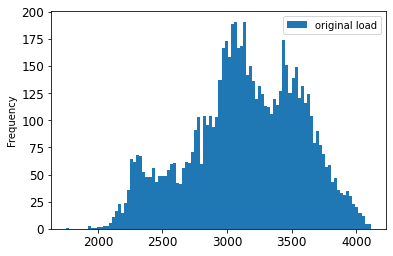

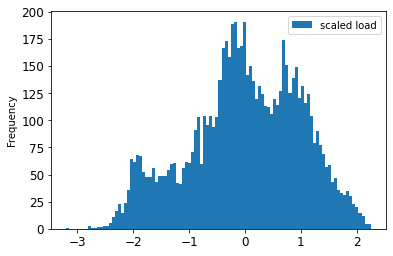

In [8]:
stlf_data[stlf_data.index <= 7200][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 7200][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

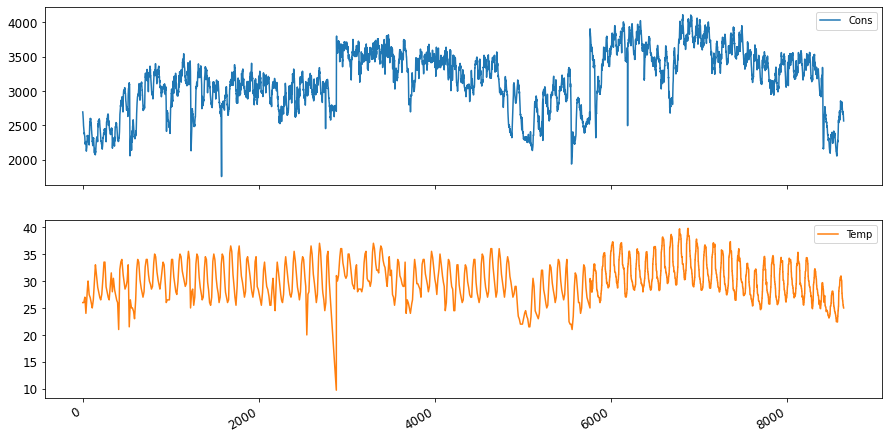

In [9]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [10]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-1.023783,-1.122319,1.231476,-1.660891,0.955554,0.749919,-1.221217,-1.184989,-1.310672,-0.208495,-0.026899,0.899237,-1.198427,-1.655292
1,-1.049229,-1.122319,1.279603,-1.660891,0.955554,0.749919,-1.168040,-1.191922,-1.255233,-0.229370,-0.162437,0.784316,-1.181228,-1.657605
2,-1.088554,-1.122319,1.327731,-1.660891,0.955554,0.749919,-1.126423,-1.252007,-1.185935,-0.296633,-0.181132,0.723337,-1.173215,-1.740881
3,-1.164890,-1.122319,1.375859,-1.660891,0.955554,0.749919,-1.103303,-1.228897,-1.236754,-0.389411,-0.269934,0.678776,-1.167352,-1.766326
4,-1.201901,-1.122319,1.423986,-1.516446,0.955554,0.749919,-1.024694,-1.221965,-1.185935,-0.435799,-0.262923,0.699884,-1.168916,-1.782519
5,-1.238913,-1.122319,1.472114,-1.516446,0.955554,0.749919,-1.050126,-1.168812,-1.192864,-0.526257,-0.328355,0.624833,-1.173020,-1.819530
6,-1.275924,-1.122319,1.520242,-1.516446,0.955554,0.749919,-1.089431,-1.127215,-1.252923,-0.602798,-0.365745,0.563854,-1.175170,-1.872734
7,-1.366140,-1.122319,1.568369,-1.516446,0.955554,0.749919,-1.165728,-1.104105,-1.229824,-0.649187,-0.435851,0.545091,-1.186896,-1.986082
8,-1.444789,-1.122319,1.616497,-1.372000,0.955554,0.749919,-1.202721,-1.025532,-1.222894,-0.658465,-0.447536,0.484113,-1.205854,-2.016154
9,-1.481800,-1.122319,1.664625,-1.372000,0.955554,0.749919,-1.239714,-1.050953,-1.169765,-0.774437,-0.480252,0.427824,-1.232433,-2.002274


In [11]:
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-1.023783,-1.122319,1.231476,-1.660891,0.955554,0.749919,-1.221217,-1.184989,-1.310672,-0.208495,-0.026899,0.899237,-1.198427,-1.655292
1,-1.049229,-1.122319,1.279603,-1.660891,0.955554,0.749919,-1.168040,-1.191922,-1.255233,-0.229370,-0.162437,0.784316,-1.181228,-1.657605
2,-1.088554,-1.122319,1.327731,-1.660891,0.955554,0.749919,-1.126423,-1.252007,-1.185935,-0.296633,-0.181132,0.723337,-1.173215,-1.740881
3,-1.164890,-1.122319,1.375859,-1.660891,0.955554,0.749919,-1.103303,-1.228897,-1.236754,-0.389411,-0.269934,0.678776,-1.167352,-1.766326
4,-1.201901,-1.122319,1.423986,-1.516446,0.955554,0.749919,-1.024694,-1.221965,-1.185935,-0.435799,-0.262923,0.699884,-1.168916,-1.782519
5,-1.238913,-1.122319,1.472114,-1.516446,0.955554,0.749919,-1.050126,-1.168812,-1.192864,-0.526257,-0.328355,0.624833,-1.173020,-1.819530
6,-1.275924,-1.122319,1.520242,-1.516446,0.955554,0.749919,-1.089431,-1.127215,-1.252923,-0.602798,-0.365745,0.563854,-1.175170,-1.872734
7,-1.366140,-1.122319,1.568369,-1.516446,0.955554,0.749919,-1.165728,-1.104105,-1.229824,-0.649187,-0.435851,0.545091,-1.186896,-1.986082
8,-1.444789,-1.122319,1.616497,-1.372000,0.955554,0.749919,-1.202721,-1.025532,-1.222894,-0.658465,-0.447536,0.484113,-1.205854,-2.016154
9,-1.481800,-1.122319,1.664625,-1.372000,0.955554,0.749919,-1.239714,-1.050953,-1.169765,-0.774437,-0.480252,0.427824,-1.232433,-2.002274


In [12]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7191,1.099750,0.339985,0.314073,1.372462,-1.465268,-1.333478,0.815693,0.666097,0.643554,1.637774,1.851946,2.179792,0.794075,NaN
7192,1.115942,0.339985,0.314073,1.516907,-1.465268,-1.333478,0.792573,0.742359,0.606595,1.844203,1.830914,2.102396,0.836680,NaN
7193,1.187652,0.339985,0.314073,1.516907,-1.465268,-1.333478,0.894303,0.737737,0.611215,1.811731,1.884662,2.149303,0.884954,NaN
7194,1.189965,0.318251,0.362359,1.516907,-1.465268,-1.333478,1.023777,0.767780,0.627384,1.869717,1.971127,2.074252,0.932055,NaN
7195,1.277868,0.296517,0.410644,1.516907,-1.465268,-1.333478,1.097763,0.813999,0.664344,1.902189,2.036559,2.078943,0.983455,NaN
7196,1.259362,0.296517,0.410644,1.661353,-1.465268,-1.333478,1.113947,0.790890,0.740573,1.932342,2.017864,1.980438,1.026843,NaN
7197,1.273241,0.296517,0.410644,1.661353,-1.465268,-1.333478,1.185620,0.892572,0.735953,1.941620,1.961779,1.952294,1.071794,NaN
7198,1.317192,0.144376,0.410644,1.661353,-1.465268,-1.333478,1.187932,1.021987,0.765982,1.960175,2.034222,1.982784,1.117917,NaN
7199,1.358830,0.144376,0.542650,1.661353,-1.465268,-1.333478,1.275790,1.095938,0.812181,1.974092,1.896347,2.109432,1.163650,NaN
7200,1.294060,0.144376,0.542650,-1.660891,-0.981104,0.749919,1.257294,1.112114,0.789082,1.948578,1.751461,2.132885,1.205865,NaN


In [13]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.dropna(how='any')

In [14]:
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7091,1.613284,0.562763,0.230579,1.228016,1.439719,-1.333478,1.587916,1.571997,1.463590,1.600663,1.901021,1.548896,1.534007,1.099750
7092,1.638729,0.562763,0.230579,1.372462,1.439719,-1.333478,1.604100,1.546577,1.355022,1.517163,1.805209,1.741214,1.557460,1.115942
7093,1.650296,0.562763,0.230579,1.372462,1.439719,-1.333478,1.541675,1.528089,1.278793,1.586746,1.922052,1.769358,1.588339,1.187652
7094,1.698873,0.430998,0.473405,1.372462,1.439719,-1.333478,1.611036,1.458760,1.438181,1.776940,2.069275,1.921805,1.609837,1.189965
7095,1.673428,0.299233,0.716231,1.372462,1.439719,-1.333478,1.611036,1.585863,1.569848,1.865078,2.197803,2.027345,1.618046,1.277868
7096,1.879304,0.299233,0.716231,1.516907,1.439719,-1.333478,1.636469,1.602040,1.544439,1.844203,2.120686,2.043763,1.645798,1.259362
7097,1.846919,0.299233,0.716231,1.516907,1.439719,-1.333478,1.648029,1.539644,1.525959,1.897550,2.167424,2.032036,1.672378,1.273241
7098,1.904749,0.270707,0.826457,1.516907,1.439719,-1.333478,1.696582,1.608973,1.456660,1.983369,2.092644,1.978093,1.709707,1.317192
7099,1.937134,0.242181,0.936684,1.516907,1.439719,-1.333478,1.671149,1.608973,1.583708,2.048314,2.097318,2.175101,1.739023,1.358830
7100,1.967206,0.242181,0.936684,1.661353,1.439719,-1.333478,1.876921,1.634393,1.599878,2.029758,1.999169,2.189174,1.769511,1.294060


In [15]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
0,-1.655292
1,-1.657605
2,-1.740881
3,-1.766326
4,-1.782519
...,...
7096,1.259362
7097,1.273241
7098,1.317192
7099,1.358830


In [16]:
X_train = train_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-1.023783,-1.122319,1.231476,-1.660891,0.955554,0.749919,-1.221217,-1.184989,-1.310672,-0.208495,-0.026899,0.899237,-1.198427
1,-1.049229,-1.122319,1.279603,-1.660891,0.955554,0.749919,-1.168040,-1.191922,-1.255233,-0.229370,-0.162437,0.784316,-1.181228
2,-1.088554,-1.122319,1.327731,-1.660891,0.955554,0.749919,-1.126423,-1.252007,-1.185935,-0.296633,-0.181132,0.723337,-1.173215
3,-1.164890,-1.122319,1.375859,-1.660891,0.955554,0.749919,-1.103303,-1.228897,-1.236754,-0.389411,-0.269934,0.678776,-1.167352
4,-1.201901,-1.122319,1.423986,-1.516446,0.955554,0.749919,-1.024694,-1.221965,-1.185935,-0.435799,-0.262923,0.699884,-1.168916
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7096,1.879304,0.299233,0.716231,1.516907,1.439719,-1.333478,1.636469,1.602040,1.544439,1.844203,2.120686,2.043763,1.645798
7097,1.846919,0.299233,0.716231,1.516907,1.439719,-1.333478,1.648029,1.539644,1.525959,1.897550,2.167424,2.032036,1.672378
7098,1.904749,0.270707,0.826457,1.516907,1.439719,-1.333478,1.696582,1.608973,1.456660,1.983369,2.092644,1.978093,1.709707
7099,1.937134,0.242181,0.936684,1.516907,1.439719,-1.333478,1.671149,1.608973,1.583708,2.048314,2.097318,2.175101,1.739023


In [17]:
valid = stlf_data.copy()[(stlf_data.index >=7201) & (stlf_data.index <=8161)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7201,3667.0,30.66245,74.458360,1.0,2.0,1.0,3689.0,3652.0,3526.0,3978.0,3794.0,4043.0,3665.333333
7202,3698.0,30.40745,75.973475,1.0,2.0,1.0,3708.0,3653.0,3582.0,3949.0,3771.0,4018.0,3675.000000
7203,3687.0,30.15245,77.488590,1.0,2.0,1.0,3726.0,3691.0,3614.0,3928.0,3900.0,4019.0,3681.083333
7204,3669.0,30.15245,77.488590,2.0,2.0,1.0,3698.0,3683.0,3621.0,3906.0,3955.0,3986.0,3685.083333
7205,3633.0,30.15245,77.488590,2.0,2.0,1.0,3667.0,3689.0,3652.0,3911.0,3892.0,3958.0,3683.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8157,3540.0,29.07245,79.205790,24.0,4.0,1.0,3549.0,3463.0,3409.0,3516.0,3516.0,3332.0,3519.250000
8158,3549.0,28.66245,79.205790,24.0,4.0,1.0,3570.0,3512.0,3471.0,3558.0,3499.0,3349.0,3525.750000
8159,3557.0,28.66245,80.055370,24.0,4.0,1.0,3588.0,3551.0,3456.0,3536.0,3505.0,3341.0,3534.166667
8160,3526.0,28.66245,80.055370,1.0,5.0,1.0,3540.0,3538.0,3453.0,3508.0,3492.0,3301.0,3540.250000


In [18]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7201,1.097427,0.184515,0.349572,-1.658081,-0.951768,0.499675,1.194520,1.015943,0.421351,2.417198,1.257447,2.026183,1.128720
7202,1.244116,0.100249,0.462723,-1.658081,-0.951768,0.499675,1.284162,1.020653,0.684918,2.283436,1.159441,1.922638,1.176282
7203,1.192065,0.015983,0.575874,-1.658081,-0.951768,0.499675,1.369085,1.199611,0.835528,2.186574,1.709131,1.926780,1.206214
7204,1.106891,0.015983,0.575874,-1.513750,-0.951768,0.499675,1.236982,1.161935,0.868474,2.085100,1.943495,1.790101,1.225895
7205,0.936541,0.015983,0.575874,-1.513750,-0.951768,0.499675,1.090724,1.190192,1.014377,2.108162,1.675042,1.674130,1.218105
7206,0.998056,-0.058370,0.604630,-1.513750,-0.951768,0.499675,1.236982,1.279671,1.019084,2.181962,1.632430,1.607862,1.215235
7207,0.903418,-0.132722,0.633385,-1.513750,-0.951768,0.499675,1.185084,1.364441,1.197933,2.043588,1.487550,1.309652,1.188583
7208,0.770924,-0.132722,0.633385,-1.369419,-0.951768,0.499675,1.100160,1.232577,1.160280,1.932889,1.432155,1.313794,1.153731
7209,0.685750,-0.132722,0.633385,-1.369419,-0.951768,0.499675,0.930313,1.086585,1.188519,1.757615,1.363977,1.297227,1.109039
7210,0.557988,-0.258295,0.733908,-1.369419,-0.951768,0.499675,0.991646,1.232577,1.277944,1.614628,1.291537,1.247525,1.045485


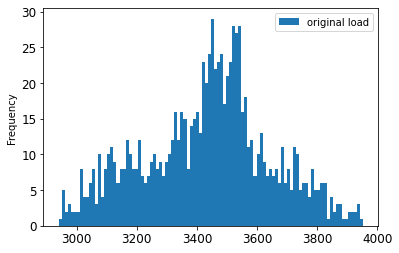

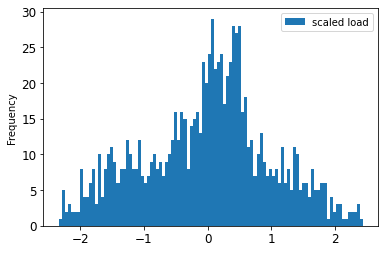

In [19]:
stlf_data[(stlf_data.index >=7201) & (stlf_data.index <=8161)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=7201) & (valid.index <=8161)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [20]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7201,1.097427,0.184515,0.349572,-1.658081,-0.951768,0.499675,1.194520,1.015943,0.421351,2.417198,1.257447,2.026183,1.128720,0.837171
7202,1.244116,0.100249,0.462723,-1.658081,-0.951768,0.499675,1.284162,1.020653,0.684918,2.283436,1.159441,1.922638,1.176282,0.761460
7203,1.192065,0.015983,0.575874,-1.658081,-0.951768,0.499675,1.369085,1.199611,0.835528,2.186574,1.709131,1.926780,1.206214,0.619503
7204,1.106891,0.015983,0.575874,-1.513750,-0.951768,0.499675,1.236982,1.161935,0.868474,2.085100,1.943495,1.790101,1.225895,0.676286
7205,0.936541,0.015983,0.575874,-1.513750,-0.951768,0.499675,1.090724,1.190192,1.014377,2.108162,1.675042,1.674130,1.218105,0.524864
7206,0.998056,-0.058370,0.604630,-1.513750,-0.951768,0.499675,1.236982,1.279671,1.019084,2.181962,1.632430,1.607862,1.215235,0.534328
7207,0.903418,-0.132722,0.633385,-1.513750,-0.951768,0.499675,1.185084,1.364441,1.197933,2.043588,1.487550,1.309652,1.188583,0.406566
7208,0.770924,-0.132722,0.633385,-1.369419,-0.951768,0.499675,1.100160,1.232577,1.160280,1.932889,1.432155,1.313794,1.153731,0.222021
7209,0.685750,-0.132722,0.633385,-1.369419,-0.951768,0.499675,0.930313,1.086585,1.188519,1.757615,1.363977,1.297227,1.109039,0.103723
7210,0.557988,-0.258295,0.733908,-1.369419,-0.951768,0.499675,0.991646,1.232577,1.277944,1.614628,1.291537,1.247525,1.045485,0.061136


In [21]:
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7201,1.097427,0.184515,0.349572,-1.658081,-0.951768,0.499675,1.194520,1.015943,0.421351,2.417198,1.257447,2.026183,1.128720,0.837171
7202,1.244116,0.100249,0.462723,-1.658081,-0.951768,0.499675,1.284162,1.020653,0.684918,2.283436,1.159441,1.922638,1.176282,0.761460
7203,1.192065,0.015983,0.575874,-1.658081,-0.951768,0.499675,1.369085,1.199611,0.835528,2.186574,1.709131,1.926780,1.206214,0.619503
7204,1.106891,0.015983,0.575874,-1.513750,-0.951768,0.499675,1.236982,1.161935,0.868474,2.085100,1.943495,1.790101,1.225895,0.676286
7205,0.936541,0.015983,0.575874,-1.513750,-0.951768,0.499675,1.090724,1.190192,1.014377,2.108162,1.675042,1.674130,1.218105,0.524864
7206,0.998056,-0.058370,0.604630,-1.513750,-0.951768,0.499675,1.236982,1.279671,1.019084,2.181962,1.632430,1.607862,1.215235,0.534328
7207,0.903418,-0.132722,0.633385,-1.513750,-0.951768,0.499675,1.185084,1.364441,1.197933,2.043588,1.487550,1.309652,1.188583,0.406566
7208,0.770924,-0.132722,0.633385,-1.369419,-0.951768,0.499675,1.100160,1.232577,1.160280,1.932889,1.432155,1.313794,1.153731,0.222021
7209,0.685750,-0.132722,0.633385,-1.369419,-0.951768,0.499675,0.930313,1.086585,1.188519,1.757615,1.363977,1.297227,1.109039,0.103723
7210,0.557988,-0.258295,0.733908,-1.369419,-0.951768,0.499675,0.991646,1.232577,1.277944,1.614628,1.291537,1.247525,1.045485,0.061136


In [22]:
valid_shifted = valid_shifted.dropna(how='any')

In [23]:
valid_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8052,0.231485,0.068856,-0.462914,1.372873,-0.393374,0.499675,0.024459,0.436683,-0.006945,-0.294934,-1.508049,-0.835798,0.257833,0.487009
8053,0.236217,0.068856,-0.462914,1.372873,-0.393374,0.499675,0.029177,0.295400,0.176611,-0.234972,-1.508049,-0.906209,0.262343,0.539060
8054,0.520132,-0.101329,-0.273245,1.372873,-0.393374,0.499675,0.227332,0.168246,0.421351,-0.179622,-1.277946,-0.529305,0.270133,0.638430
8055,0.416030,-0.271513,-0.083576,1.372873,-0.393374,0.499675,0.203742,0.337785,0.402525,-0.004348,-1.013754,-0.413335,0.270543,0.723605
8056,0.368711,-0.271513,-0.083576,1.517204,-0.393374,0.499675,0.227332,0.022253,0.435471,0.115576,-1.060627,-0.541731,0.263983,0.496473
8057,0.468081,-0.271513,-0.083576,1.517204,-0.393374,0.499675,0.232050,0.026963,0.294275,0.051001,-1.179939,-0.537589,0.278334,0.496473
8058,0.529596,-0.304559,-0.067835,1.517204,-0.393374,0.499675,0.515130,0.224759,0.167198,0.138638,-0.996709,-0.347066,0.309086,0.539060
8059,0.557988,-0.337605,-0.052093,1.517204,-0.393374,0.499675,0.411334,0.201212,0.336634,0.406161,-0.779390,-0.338783,0.327537,0.576915
8060,0.496473,-0.337605,-0.052093,1.661535,-0.393374,0.499675,0.364154,0.224759,0.021295,0.253950,-0.792173,-0.276656,0.368129,0.430226
8061,0.382907,-0.337605,-0.052093,1.661535,-0.393374,0.499675,0.463232,0.229468,0.026001,0.286237,-0.711211,-0.392626,0.398470,0.222021


In [24]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
7201,0.837171
7202,0.761460
7203,0.619503
7204,0.676286
7205,0.524864
...,...
8057,0.496473
8058,0.539060
8059,0.576915
8060,0.430226


In [25]:
X_valid = valid_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7201,1.097427,0.184515,0.349572,-1.658081,-0.951768,0.499675,1.194520,1.015943,0.421351,2.417198,1.257447,2.026183,1.128720
7202,1.244116,0.100249,0.462723,-1.658081,-0.951768,0.499675,1.284162,1.020653,0.684918,2.283436,1.159441,1.922638,1.176282
7203,1.192065,0.015983,0.575874,-1.658081,-0.951768,0.499675,1.369085,1.199611,0.835528,2.186574,1.709131,1.926780,1.206214
7204,1.106891,0.015983,0.575874,-1.513750,-0.951768,0.499675,1.236982,1.161935,0.868474,2.085100,1.943495,1.790101,1.225895
7205,0.936541,0.015983,0.575874,-1.513750,-0.951768,0.499675,1.090724,1.190192,1.014377,2.108162,1.675042,1.674130,1.218105
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8057,0.468081,-0.271513,-0.083576,1.517204,-0.393374,0.499675,0.232050,0.026963,0.294275,0.051001,-1.179939,-0.537589,0.278334
8058,0.529596,-0.304559,-0.067835,1.517204,-0.393374,0.499675,0.515130,0.224759,0.167198,0.138638,-0.996709,-0.347066,0.309086
8059,0.557988,-0.337605,-0.052093,1.517204,-0.393374,0.499675,0.411334,0.201212,0.336634,0.406161,-0.779390,-0.338783,0.327537
8060,0.496473,-0.337605,-0.052093,1.661535,-0.393374,0.499675,0.364154,0.224759,0.021295,0.253950,-0.792173,-0.276656,0.368129


In [26]:
#from keras.layers import RepeatVector

model = models.Sequential()

model.add(Dense(13, input_shape=(13,),activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [27]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.000005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 2,103
Trainable params: 2,103
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [29]:
import time
start=time.time()

history = model.fit(X_train,
          y_train,
          batch_size=300,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )

stop=time.time()
print(f"Training time: {stop - start}s")

Epoch 1/300
24/24 [==============================] - 0s 10ms/step - loss: 1.1355 - val_loss: 1.2574
Epoch 2/300
24/24 [==============================] - 0s 3ms/step - loss: 1.1332 - val_loss: 1.2545
Epoch 3/300
24/24 [==============================] - 0s 3ms/step - loss: 1.1310 - val_loss: 1.2517
Epoch 4/300
24/24 [==============================] - 0s 3ms/step - loss: 1.1288 - val_loss: 1.2489
Epoch 5/300
24/24 [==============================] - 0s 3ms/step - loss: 1.1266 - val_loss: 1.2461
Epoch 6/300
24/24 [==============================] - 0s 3ms/step - loss: 1.1244 - val_loss: 1.2434
Epoch 7/300
24/24 [==============================] - 0s 3ms/step - loss: 1.1223 - val_loss: 1.2407
Epoch 8/300
24/24 [==============================] - 0s 3ms/step - loss: 1.1201 - val_loss: 1.2380
Epoch 9/300
24/24 [==============================] - 0s 3ms/step - loss: 1.1180 - val_loss: 1.2353
Epoch 10/300
24/24 [==============================] - 0s 3ms/step - loss: 1.1160 - val_loss: 1.2327
Epoch 11

Epoch 83/300
24/24 [==============================] - 0s 3ms/step - loss: 1.0185 - val_loss: 1.1032
Epoch 84/300
24/24 [==============================] - 0s 3ms/step - loss: 1.0177 - val_loss: 1.1020
Epoch 85/300
24/24 [==============================] - 0s 3ms/step - loss: 1.0169 - val_loss: 1.1009
Epoch 86/300
24/24 [==============================] - 0s 2ms/step - loss: 1.0161 - val_loss: 1.0998
Epoch 87/300
24/24 [==============================] - 0s 2ms/step - loss: 1.0153 - val_loss: 1.0988
Epoch 88/300
24/24 [==============================] - 0s 2ms/step - loss: 1.0146 - val_loss: 1.0976
Epoch 89/300
24/24 [==============================] - 0s 2ms/step - loss: 1.0138 - val_loss: 1.0966
Epoch 90/300
24/24 [==============================] - 0s 3ms/step - loss: 1.0131 - val_loss: 1.0956
Epoch 91/300
24/24 [==============================] - 0s 2ms/step - loss: 1.0123 - val_loss: 1.0945
Epoch 92/300
24/24 [==============================] - 0s 2ms/step - loss: 1.0116 - val_loss: 1.0935


24/24 [==============================] - 0s 3ms/step - loss: 0.9603 - val_loss: 1.0161
Epoch 246/300
24/24 [==============================] - 0s 3ms/step - loss: 0.9601 - val_loss: 1.0159
Epoch 247/300
24/24 [==============================] - 0s 4ms/step - loss: 0.9600 - val_loss: 1.0157
Epoch 248/300
24/24 [==============================] - 0s 3ms/step - loss: 0.9598 - val_loss: 1.0155
Epoch 249/300
24/24 [==============================] - 0s 3ms/step - loss: 0.9597 - val_loss: 1.0153
Epoch 250/300
24/24 [==============================] - 0s 3ms/step - loss: 0.9595 - val_loss: 1.0151
Epoch 251/300
24/24 [==============================] - 0s 4ms/step - loss: 0.9594 - val_loss: 1.0148
Epoch 252/300
24/24 [==============================] - 0s 4ms/step - loss: 0.9593 - val_loss: 1.0146
Epoch 253/300
24/24 [==============================] - 0s 3ms/step - loss: 0.9591 - val_loss: 1.0144
Epoch 254/300
24/24 [==============================] - 0s 5ms/step - loss: 0.9590 - val_loss: 1.0142
Epoc

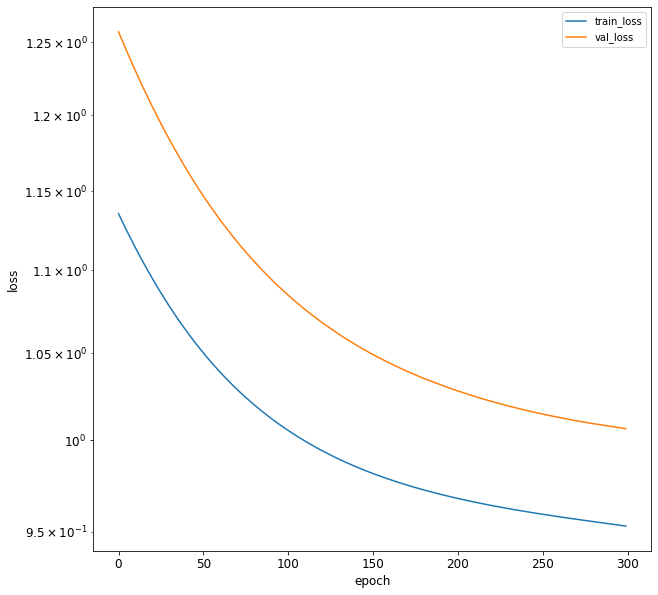

In [30]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [31]:
test = stlf_data.copy()[(stlf_data.index >= 8162) & (stlf_data.index<= 8373)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8162,3490.0,28.367450,80.524480,1.0,5.0,1.0,3549.0,3570.0,3512.0,3480.0,3429.0,3300.0,3540.000000
8163,3468.0,28.072450,80.993590,1.0,5.0,1.0,3557.0,3588.0,3551.0,3465.0,3441.0,3256.0,3533.083333
8164,3457.0,28.072450,80.993590,2.0,5.0,1.0,3526.0,3540.0,3538.0,3408.0,3421.0,3244.0,3526.333333
8165,3381.0,28.072450,80.993590,2.0,5.0,1.0,3482.0,3540.0,3549.0,3339.0,3353.0,3201.0,3512.333333
8166,3399.0,27.527450,84.024353,2.0,5.0,1.0,3490.0,3549.0,3570.0,3288.0,3351.0,3185.0,3498.083333
8167,3385.0,26.982450,87.055115,2.0,5.0,1.0,3468.0,3557.0,3588.0,3282.0,3282.0,3153.0,3481.166667
8168,3350.0,26.982450,87.055115,3.0,5.0,1.0,3457.0,3526.0,3540.0,3304.0,3281.0,3117.0,3465.333333
8169,3326.0,26.982450,87.055115,3.0,5.0,1.0,3381.0,3482.0,3540.0,3291.0,3228.0,3122.0,3447.500000
8170,3321.0,27.122450,85.408722,3.0,5.0,1.0,3399.0,3490.0,3549.0,3271.0,3222.0,3094.0,3428.500000
8171,3301.0,27.262451,83.762330,3.0,5.0,1.0,3385.0,3468.0,3557.0,3253.0,3205.0,3093.0,3407.166667


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 8162 to 8373
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


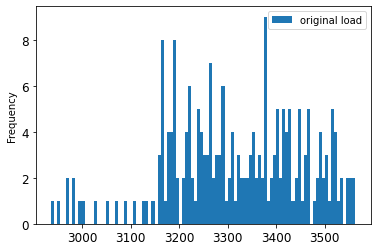

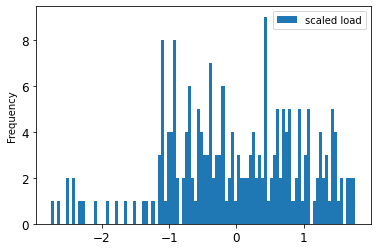

In [33]:
stlf_data[(stlf_data.index >= 8162) & (stlf_data.index <=8373)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=8162) & (test.index <= 8373)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [34]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8162,1.243697,-0.193343,0.302048,-1.498364,-1.004934,0.340279,1.661252,1.813155,1.320477,0.932265,0.523804,-0.130136,1.760353,0.543059
8163,1.084789,-0.301916,0.340226,-1.498364,-1.004934,0.340279,1.721473,1.954644,1.635181,0.809058,0.609076,-0.401946,1.701735,0.174682
8164,1.005335,-0.301916,0.340226,-1.357685,-1.004934,0.340279,1.488118,1.577338,1.530280,0.340872,0.466955,-0.476077,1.644529,0.080783
8165,0.456382,-0.301916,0.340226,-1.357685,-1.004934,0.340279,1.156904,1.577338,1.619042,-0.225879,-0.016257,-0.741710,1.525880,-0.107017
8166,0.586397,-0.502498,0.586882,-1.357685,-1.004934,0.340279,1.217125,1.648083,1.788498,-0.644783,-0.030469,-0.840550,1.405112,-0.395940
8167,0.485274,-0.703081,0.833537,-1.357685,-1.004934,0.340279,1.051518,1.710967,1.933746,-0.694065,-0.520787,-1.038230,1.261744,-0.410386
8168,0.232467,-0.703081,0.833537,-1.217006,-1.004934,0.340279,0.968715,1.467290,1.546418,-0.513362,-0.527893,-1.260621,1.127557,-0.684863
8169,0.059113,-0.703081,0.833537,-1.217006,-1.004934,0.340279,0.396618,1.121426,1.546418,-0.620141,-0.904514,-1.229733,0.976421,-0.728201
8170,0.022998,-0.651555,0.699547,-1.217006,-1.004934,0.340279,0.532115,1.184311,1.619042,-0.784417,-0.947151,-1.402704,0.815397,-0.952116
8171,-0.121463,-0.600029,0.565558,-1.217006,-1.004934,0.340279,0.426729,1.011378,1.683597,-0.932265,-1.067954,-1.408881,0.634598,-0.901555


In [35]:
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8162,1.243697,-0.193343,0.302048,-1.498364,-1.004934,0.340279,1.661252,1.813155,1.320477,0.932265,0.523804,-0.130136,1.760353,0.543059
8163,1.084789,-0.301916,0.340226,-1.498364,-1.004934,0.340279,1.721473,1.954644,1.635181,0.809058,0.609076,-0.401946,1.701735,0.174682
8164,1.005335,-0.301916,0.340226,-1.357685,-1.004934,0.340279,1.488118,1.577338,1.530280,0.340872,0.466955,-0.476077,1.644529,0.080783
8165,0.456382,-0.301916,0.340226,-1.357685,-1.004934,0.340279,1.156904,1.577338,1.619042,-0.225879,-0.016257,-0.741710,1.525880,-0.107017
8166,0.586397,-0.502498,0.586882,-1.357685,-1.004934,0.340279,1.217125,1.648083,1.788498,-0.644783,-0.030469,-0.840550,1.405112,-0.395940
8167,0.485274,-0.703081,0.833537,-1.357685,-1.004934,0.340279,1.051518,1.710967,1.933746,-0.694065,-0.520787,-1.038230,1.261744,-0.410386
8168,0.232467,-0.703081,0.833537,-1.217006,-1.004934,0.340279,0.968715,1.467290,1.546418,-0.513362,-0.527893,-1.260621,1.127557,-0.684863
8169,0.059113,-0.703081,0.833537,-1.217006,-1.004934,0.340279,0.396618,1.121426,1.546418,-0.620141,-0.904514,-1.229733,0.976421,-0.728201
8170,0.022998,-0.651555,0.699547,-1.217006,-1.004934,0.340279,0.532115,1.184311,1.619042,-0.784417,-0.947151,-1.402704,0.815397,-0.952116
8171,-0.121463,-0.600029,0.565558,-1.217006,-1.004934,0.340279,0.426729,1.011378,1.683597,-0.932265,-1.067954,-1.408881,0.634598,-0.901555


In [36]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.tail(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8269,-0.728201,-0.655235,0.675390,-1.076327,0.516823,0.340279,-0.190533,0.696956,1.118744,-0.825486,-1.096378,-1.353284,0.116920,-2.656761
8270,-0.952116,-0.636833,0.661303,-1.076327,0.516823,0.340279,-0.491636,0.421837,1.126813,-1.285458,-0.961363,-1.266799,-0.096366,-2.757884
8271,-0.901555,-0.618431,0.647216,-1.076327,0.516823,0.340279,-0.506692,0.020949,0.884733,-1.556513,-1.039529,-1.303864,-0.283521,-2.490630
8272,-1.046016,-0.618431,0.647216,-0.935648,0.516823,0.340279,-0.792740,-0.081238,0.804040,-1.433306,-1.174545,-1.415059,-0.477738,-2.418399
8273,-1.125470,-0.618431,0.647216,-0.935648,0.516823,0.340279,-0.837905,-0.285612,0.642654,-1.679720,-1.245605,-1.538609,-0.665600,-2.317276


In [37]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
8162,0.543059
8163,0.174682
8164,0.080783
8165,-0.107017
8166,-0.395940
...,...
8269,-2.656761
8270,-2.757884
8271,-2.490630
8272,-2.418399


In [38]:
X_test = test_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8162,1.243697,-0.193343,0.302048,-1.498364,-1.004934,0.340279,1.661252,1.813155,1.320477,0.932265,0.523804,-0.130136,1.760353
8163,1.084789,-0.301916,0.340226,-1.498364,-1.004934,0.340279,1.721473,1.954644,1.635181,0.809058,0.609076,-0.401946,1.701735
8164,1.005335,-0.301916,0.340226,-1.357685,-1.004934,0.340279,1.488118,1.577338,1.530280,0.340872,0.466955,-0.476077,1.644529
8165,0.456382,-0.301916,0.340226,-1.357685,-1.004934,0.340279,1.156904,1.577338,1.619042,-0.225879,-0.016257,-0.741710,1.525880
8166,0.586397,-0.502498,0.586882,-1.357685,-1.004934,0.340279,1.217125,1.648083,1.788498,-0.644783,-0.030469,-0.840550,1.405112
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8269,-0.728201,-0.655235,0.675390,-1.076327,0.516823,0.340279,-0.190533,0.696956,1.118744,-0.825486,-1.096378,-1.353284,0.116920
8270,-0.952116,-0.636833,0.661303,-1.076327,0.516823,0.340279,-0.491636,0.421837,1.126813,-1.285458,-0.961363,-1.266799,-0.096366
8271,-0.901555,-0.618431,0.647216,-1.076327,0.516823,0.340279,-0.506692,0.020949,0.884733,-1.556513,-1.039529,-1.303864,-0.283521
8272,-1.046016,-0.618431,0.647216,-0.935648,0.516823,0.340279,-0.792740,-0.081238,0.804040,-1.433306,-1.174545,-1.415059,-0.477738


In [39]:
import time
start=time.time()

predictions = model.predict(X_test)
stop=time.time()
predictions

print(f"Test time: {stop - start}s")

Test time: 0.1890106201171875s


In [40]:
feature=stlf_data.copy()[(stlf_data.index >= 8162) & (stlf_data.index <=8373)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    3317.816038
dtype: float64
Cons    138.772988
dtype: float64


In [41]:
load_mean=3317.816038
load_std=138.772988
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(112, 1)


In [42]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(112, 1)


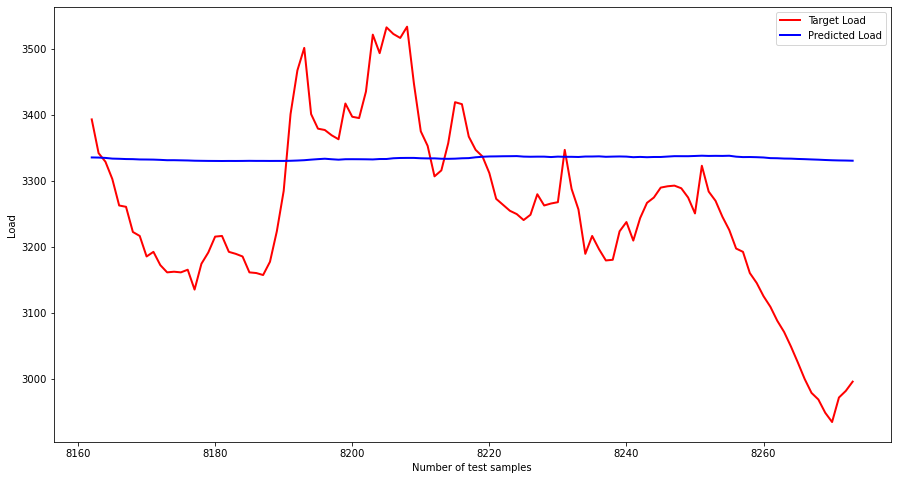

In [43]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [44]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

3.9193103450908664


In [45]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100   -2.622796
dtype: float64


In [46]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
8162  339219.492297
8163  334105.923483
8164  332802.471839
8165  330195.558633
8166  326184.859531
...             ...
8269  294799.969895
8270  293396.129635
8271  297106.312533
8272  298109.061001
8273  299512.906695

[112 rows x 1 columns]


In [47]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+100
8162    3316.671239
8163      44.427487
8164      34.048405
8165     953.003863
8166    4996.081475
...             ...
8269  146376.829886
8270  156997.729638
8271  128785.987535
8272  121590.112057
8273  111820.715977

[112 rows x 1 columns]
y_t+100    23738.288696
dtype: float64


In [48]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    154.072349
dtype: float64


In [49]:
a=np.array(rescaled_predicted_load)

In [50]:
for i in  range(0,102):
    b=a[i]
    print(b)

[3335.5874]
[3335.3918]
[3334.8616]
[3333.8357]
[3333.5532]
[3333.1519]
[3333.008]
[3332.5496]
[3332.461]
[3332.3127]
[3331.9216]
[3331.4023]
[3331.4294]
[3331.2163]
[3331.011]
[3330.6384]
[3330.4797]
[3330.3413]
[3330.287]
[3330.2217]
[3330.2976]
[3330.262]
[3330.323]
[3330.4656]
[3330.3594]
[3330.3696]
[3330.2932]
[3330.338]
[3330.322]
[3330.5376]
[3330.9097]
[3331.4087]
[3332.2732]
[3333.0112]
[3333.647]
[3332.8647]
[3332.2026]
[3332.884]
[3332.9307]
[3332.877]
[3332.7737]
[3332.5784]
[3333.1995]
[3333.2327]
[3334.3547]
[3334.777]
[3334.8872]
[3334.876]
[3334.3523]
[3334.1394]
[3334.203]
[3333.6216]
[3333.5015]
[3333.753]
[3334.3215]
[3334.5784]
[3335.8274]
[3336.6062]
[3337.0818]
[3337.2014]
[3337.4092]
[3337.4834]
[3337.636]
[3336.8596]
[3336.6484]
[3336.7979]
[3336.7913]
[3336.1887]
[3336.8374]
[3336.5212]
[3336.5422]
[3336.2964]
[3336.9727]
[3337.008]
[3337.251]
[3336.5808]
[3336.8713]
[3337.085]
[3336.8555]
[3335.9822]
[3336.3882]
[3335.9497]
[3336.2883]
[3336.285]
[3336.92]
[3